In [1]:
from genericIO import defaultIO as io
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
print(sys.version)


3.6.9 (default, Dec  8 2021, 21:08:43) 
[GCC 8.4.0]


In [2]:
!pwd
!echo ${PYTHONPATH}
!whoami

/net/server2/homes/sep/gbarnier/projects/reproducibility/notebooks
/net/server2/sep/gbarnier/code/gpu/acousticIsoLib_2D/local_jarvis1/lib/python3.6:/net/server2/sep/gbarnier/code/gpu/acousticIsoLib_2D/local_jarvis1/lib/python:/net/server2/sep/gbarnier/code/gpu/acousticIsoLib_2D/local/lib/python3.6/:/opt/SEP/SEP8.1/lib/python/:/opt/RSF/RSF1.7/lib/python2.7/site-packages
gbarnier


In [3]:
# Read velocity model
vel_true = io.getVector("../vel/reproMarmousi-trueVel.H")

# Read initial model
vel_init = io.getVector("../vel/reproMarmousi-initVel1.H")

In [4]:
z_axis_sep = vel_true.getHyper().getAxis(1)
x_axis_sep = vel_true.getHyper().getAxis(2)
z_axis = np.linspace(z_axis_sep.o, z_axis_sep.o+z_axis_sep.n*z_axis_sep.d, z_axis_sep.n, endpoint=False)
x_axis = np.linspace(x_axis_sep.o, x_axis_sep.o+x_axis_sep.n*x_axis_sep.d, x_axis_sep.n, endpoint=False)

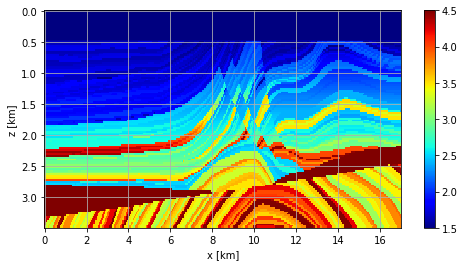

In [5]:
# Plot true model
plt.figure(figsize=(8,4))
plt.pcolormesh(x_axis, z_axis, vel_true.getNdArray().T, shading='auto', vmin=1.5, vmax=4.5, cmap='jet') 
plt.gca().invert_yaxis()
plt.colorbar()
plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.grid()


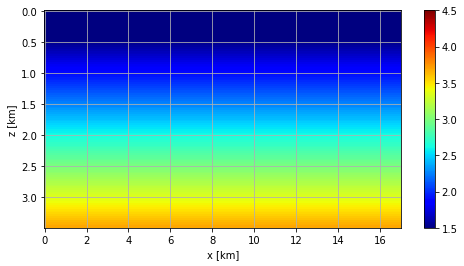

In [6]:
# Plot initial model
plt.figure(figsize=(8,4))
plt.pcolormesh(x_axis, z_axis, vel_init.getNdArray().T, shading='auto', vmin=1.5, vmax=4.5, cmap='jet') 
plt.gca().invert_yaxis()
plt.colorbar()
plt.xlabel('x [km]')
plt.ylabel('z [km]')
plt.grid()


In [7]:
# Wavelet
wav_4_6 = io.getVector("../wav/reproMarmousi-wav-4-6.H")

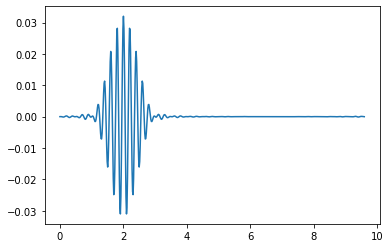

In [8]:
t_axis_sep = wav_4_6.getHyper().getAxis(1)
t_axis = np.linspace(t_axis_sep.o, t_axis_sep.o+t_axis_sep.n*t_axis_sep.d, t_axis_sep.n, endpoint=False)
plt.plot(t_axis, wav_4_6.getNdArray());

In [9]:
from scipy import signal
fs = 1/t_axis_sep.d
freqs, spectra = signal.welch(wav_4_6.getNdArray(), fs=fs, scaling='density',nperseg=t_axis_sep.n)

1.9896064e-05


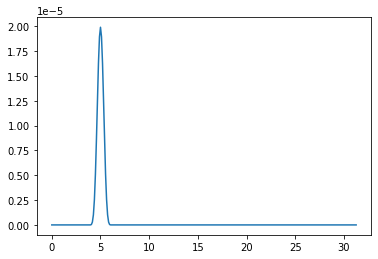

In [10]:
plt.plot(freqs, np.abs(spectra));
print(np.amax(np.abs(spectra)))

In [11]:
PREF = 2*10**(-5)
PREF = PREF**2
dbnorm = 10*np.log10(spectra/PREF)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


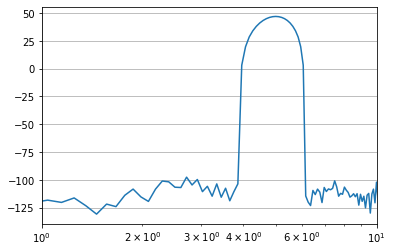

In [12]:
plt.plot(freqs, dbnorm)
plt.xscale('log')
plt.xlim([1,10])
plt.grid()

In [13]:
wavelet_fft = np.fft.rfft(wav_4_6.getNdArray())
fft_frequencies = np.fft.rfftfreq(t_axis_sep.n, t_axis_sep.d)

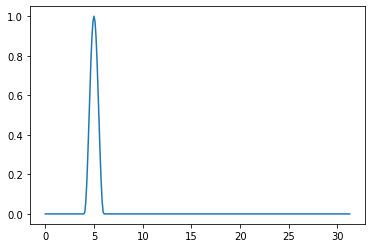

In [14]:
plt.plot(fft_frequencies, np.abs(wavelet_fft));

In [15]:
%env ACO_GPU_PACK /net/server2/sep/gbarnier/code/gpu/acousticIsoLib_2D/local_jarvis/bin

env: ACO_GPU_PACK=/net/server2/sep/gbarnier/code/gpu/acousticIsoLib_2D/local_jarvis/bin


In [16]:
! ${ACO_GPU_PACK}/nonlinearPythonFloatMain.py par=../par/reproMarmousi-fwi-4-13.p vel=../vel/reproMarmousi-trueVel.pad.H model=../wav/reproMarmousi-wav-4-6.H data=test.H info=0 nGpu=4

-------------------------------------------------------------------
------------------ Running Python nonlinear forward ---------------
-------------------- Single precision Python code -----------------
-------------------------------------------------------------------

-------------------------------------------------------------------
--------------------------- All done ------------------------------
-------------------------------------------------------------------



In [17]:
!In test.H

---------------------------------------------------------------------------
	 	 test.H
---------------------------------------------------------------------------
file_type=REGULAR                     format=native_float           esize=4
---------------------------------------------------------------------------
n1=600        o1=0          d1=0.016       label1=
n2=567        o2=-9.126e-08 d2=0.03        label2=
n3=140        o3=-9.126e-08 d3=0.12        label3=
---------------------------------------------------------------------------
HISTORY[181.0MBytes]->test.H
---------------------------------------------------------------------------
DATA->                   [  100./0.00 ]  in=/net/vision/scr2/gbarnier/test.H@
